In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Data preprocessing

In [90]:
index_data = pd.read_csv("index_id.csv")
index_data

,Student Id,Student Name,Index Id
0,170104029,Shafayet-Ul-Islam,201
1,170104095,Toukir Ahmed Sojib,202
2,170104101,Mohana Rahman,203
3,170104138,Sanita Shahrin Joyee,204
4,170104042,Farhana Akter Tumpa,205
...,...,...,...
133,170104106,Farhana Chowdhury Nova,334
134,170104062,Minhajul Islam,335
135,170104111,Md. Sayeedur Rahman,336
136,170104117,Touhidul Islam Chowdhury,337


In [53]:
index_id = index_data.loc[index_data['Student Id'] == 170104047]
index_id

,Student Id,Student Name,Index Id
100,170104047,Md. Rishadul Islam Khan,301


In [54]:
index = int(index_id["Index Id"])
index

301

In [55]:
raw_data = pd.read_csv("Matrix_Factorization_Assignment.csv")

In [56]:
print(len(raw_data))

45000


In [57]:
raw_data

,Index,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,3964,1.0,NaN,NaN,10.0,8.0,NaN,5.0,9.0,1.0,...,NaN,NaN,9.0,5.0,9.0,4.0,NaN,1.0,NaN,4.0
44996,17258,3.0,2.0,3.0,7.0,NaN,10.0,9.0,NaN,NaN,...,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,NaN,8.0
44997,20528,NaN,9.0,NaN,3.0,1.0,NaN,7.0,10.0,10.0,...,3.0,4.0,NaN,NaN,NaN,2.0,10.0,0.0,1.0,4.0
44998,1875,10.0,NaN,7.0,3.0,3.0,8.0,NaN,8.0,9.0,...,NaN,NaN,NaN,3.0,5.0,NaN,6.0,NaN,8.0,8.0


In [58]:
len(raw_data.columns)

5001

In [59]:
def collected_rows():
    row_index_list = []
    for i in range(len(raw_data)):
        if raw_data['Index'][i] % index == 0:
            row_index_list.append(i)
    return row_index_list

In [60]:
# raw_data['Index'][10]

In [61]:
rows = collected_rows()
len(rows)

147

In [62]:
def collected_columns():
    column_index_list = []
    for i in range(len(raw_data.columns)):
        if i % index == 0:
            column_index_list.append(i)
    return column_index_list

In [63]:
columns = collected_columns()
len(columns)

17

In [64]:
raw_data = raw_data.drop(rows, axis = 0)

In [65]:
len(raw_data)

44853

In [66]:
raw_data = raw_data.drop([str(x) for x in columns], axis = 1)
len(raw_data.columns)

4984

In [67]:
raw_data

,Index,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,3964,NaN,NaN,10.0,8.0,NaN,5.0,9.0,1.0,3.0,...,NaN,NaN,9.0,5.0,9.0,4.0,NaN,1.0,NaN,4.0
44996,17258,2.0,3.0,7.0,NaN,10.0,9.0,NaN,NaN,1.0,...,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,NaN,8.0
44997,20528,9.0,NaN,3.0,1.0,NaN,7.0,10.0,10.0,NaN,...,3.0,4.0,NaN,NaN,NaN,2.0,10.0,0.0,1.0,4.0
44998,1875,NaN,7.0,3.0,3.0,8.0,NaN,8.0,9.0,NaN,...,NaN,NaN,NaN,3.0,5.0,NaN,6.0,NaN,8.0,8.0


In [68]:
raw_data.drop(['Index'], axis = 1, inplace = True)
raw_data

,1,2,3,4,5,6,7,8,9,10,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,NaN,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,0.0,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,7.0,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,NaN,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,6.0,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,NaN,NaN,10.0,8.0,NaN,5.0,9.0,1.0,3.0,6.0,...,NaN,NaN,9.0,5.0,9.0,4.0,NaN,1.0,NaN,4.0
44996,2.0,3.0,7.0,NaN,10.0,9.0,NaN,NaN,1.0,4.0,...,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,NaN,8.0
44997,9.0,NaN,3.0,1.0,NaN,7.0,10.0,10.0,NaN,9.0,...,3.0,4.0,NaN,NaN,NaN,2.0,10.0,0.0,1.0,4.0
44998,NaN,7.0,3.0,3.0,8.0,NaN,8.0,9.0,NaN,NaN,...,NaN,NaN,NaN,3.0,5.0,NaN,6.0,NaN,8.0,8.0


In [69]:
raw_data.to_csv('raw_data.csv', header=False, index=False)

# end

# Filling the NaN values of the dataset

In [19]:
raw_data = raw_data.replace(np.nan, -1)
raw_data = np.array(raw_data, dtype = np.float32)
raw_data += 1

In [20]:
raw_data_df = pd.DataFrame(raw_data)
raw_data_df

,0,1,2,3,4,5,6,7,8,9,...,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982
0,8.0,2.0,10.0,7.0,7.0,9.0,0.0,0.0,11.0,0.0,...,3.0,0.0,8.0,10.0,7.0,11.0,8.0,0.0,0.0,0.0
1,4.0,4.0,7.0,0.0,4.0,6.0,8.0,10.0,0.0,1.0,...,0.0,0.0,0.0,6.0,10.0,4.0,1.0,0.0,10.0,3.0
2,8.0,0.0,10.0,6.0,7.0,6.0,1.0,0.0,11.0,8.0,...,0.0,10.0,11.0,0.0,0.0,10.0,1.0,0.0,0.0,8.0
3,5.0,2.0,0.0,6.0,0.0,11.0,0.0,9.0,1.0,0.0,...,4.0,3.0,2.0,4.0,0.0,0.0,3.0,0.0,5.0,3.0
4,1.0,6.0,1.0,4.0,6.0,0.0,0.0,0.0,1.0,7.0,...,10.0,0.0,6.0,4.0,6.0,2.0,7.0,7.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44848,0.0,0.0,11.0,9.0,0.0,6.0,10.0,2.0,4.0,7.0,...,0.0,0.0,10.0,6.0,10.0,5.0,0.0,2.0,0.0,5.0
44849,3.0,4.0,8.0,0.0,11.0,10.0,0.0,0.0,2.0,5.0,...,4.0,0.0,4.0,0.0,0.0,6.0,5.0,0.0,0.0,9.0
44850,10.0,0.0,4.0,2.0,0.0,8.0,11.0,11.0,0.0,10.0,...,4.0,5.0,0.0,0.0,0.0,3.0,11.0,1.0,2.0,5.0
44851,0.0,8.0,4.0,4.0,9.0,0.0,9.0,10.0,0.0,0.0,...,0.0,0.0,0.0,4.0,6.0,0.0,7.0,0.0,9.0,9.0


# end

# Training functions

In [21]:

def loss_MSE(data, predictions):
    index_list = np.nonzero(data)
    return mean_squared_error(data[index_list], predictions[index_list])

def normalize(V):
    return V / np.sum(np.sum(V))

def save_UV(UV_data, K, name_ext):
    file_name = name_ext + str(K)
    UV_data.to_csv(file_name + '.csv', header=False, index=False)
    
def update_UV(data, UV, lamda, K):
    temp = (UV.T).dot(UV) + lamda * np.eye(K)
    temp1 = data.dot(UV)
    UV_star = temp1.dot(np.linalg.inv(temp))
    return UV_star

In [22]:
loss_curve = []
k_values = [1, 10, 20, 50, 100, 250, 500, 1000, 1500, 2000]
N, M = raw_data.shape

def train_UV(U, V, lamda_u, lamda_v, K, num_iter = 100):
    loss_status = []
    for i in range(num_iter):
        U = update_UV(raw_data, V, lamda_u, K)
        V = update_UV(raw_data.T, U, lamda_v, K)
        prediction = U.dot(V.T)
        loss = loss_MSE(raw_data, prediction)
        loss_status.append(loss)
        if i % 20 == 0:
            print("iteration", i, "loss", loss)
            
    U_data = pd.DataFrame(U)
    V_data = pd.DataFrame(V)
    
    save_UV(U_data, K, 'U_matrix')
    save_UV(V_data, K, 'V_matrix')
    return loss_status

def plot(loss_status, K):
    plt.plot(loss_status, label = 'K = ' + str(K))
    plt.legend()
    plt.xlabel('Number of iterations')
    plt.ylabel('Mean squared error')
    file_name = 'Plot_for_' + str(K)
    plt.savefig(file_name + '.png')
    plt.show()

def train_k():
    np.random.seed(42)
    for K in k_values:
        print('Training for k = ', K)
        V = np.random.random((M, K))
        V = normalize(V)
        
        lamda_u = (0.00015 + 0.0001 * (index % 8))
        lamda_v = (0.00025 - 0.0001 * (index % 7))
        
        U = np.zeros((N, K))
        
        loss_status = train_UV(U, V, lamda_u, lamda_v, K)
        loss_curve.append(loss_status)
        plot(loss_status, K)
        

Training for k =  1
iteration 0 loss 15.519912691773492
iteration 20 loss 15.517683954496688
iteration 40 loss 15.517683954496736
iteration 60 loss 15.517683954496764
iteration 80 loss 15.517683954496789


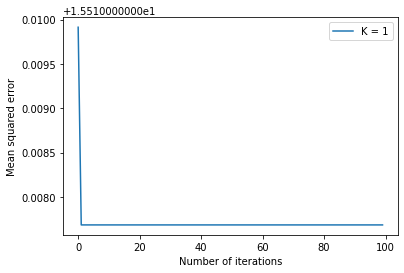

Training for k =  10
iteration 0 loss 15.485078033344148
iteration 20 loss 15.466968749418923
iteration 40 loss 15.466093802872063
iteration 60 loss 15.4657859065587
iteration 80 loss 15.465637668254352


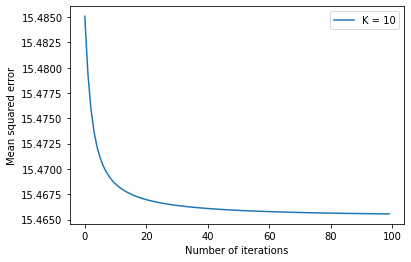

Training for k =  20
iteration 0 loss 15.44825839641377
iteration 20 loss 15.411155932953093
iteration 40 loss 15.409288737043694
iteration 60 loss 15.408654902965079
iteration 80 loss 15.408365352710419


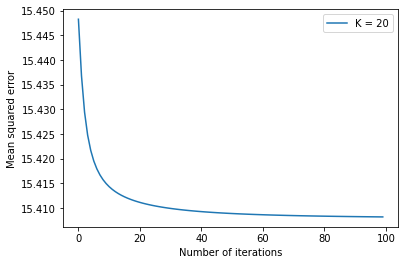

Training for k =  50
iteration 0 loss 15.338938629627537
iteration 20 loss 15.243733401181517
iteration 40 loss 15.239825260735088
iteration 60 loss 15.23875246159514
iteration 80 loss 15.238292347791146


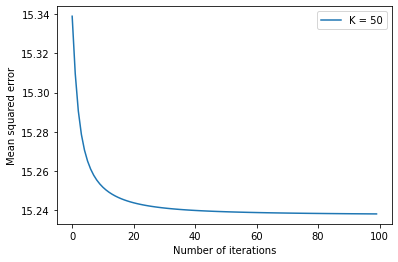

Training for k =  100
iteration 0 loss 15.156545155498423
iteration 20 loss 14.96942749877371
iteration 40 loss 14.96269012691592
iteration 60 loss 14.960958858101463
iteration 80 loss 14.960303525606543


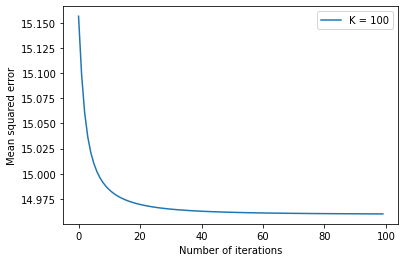

Training for k =  250
iteration 0 loss 14.613715479651384
iteration 20 loss 14.173501506361632
iteration 40 loss 14.162650766901603
iteration 60 loss 14.16045103118764
iteration 80 loss 14.15969116304459


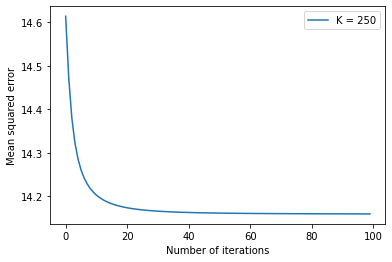

Training for k =  500
iteration 0 loss 13.720152411149865
iteration 20 loss 12.926758871428783
iteration 40 loss 12.913523566123445
iteration 60 loss 12.910891725732876
iteration 80 loss 12.909963771067805


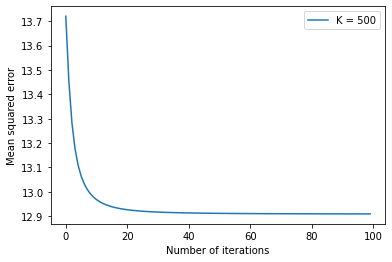

Training for k =  1000
iteration 0 loss 11.975426816630238
iteration 20 loss 10.675708919219419
iteration 40 loss 10.662102729037768
iteration 60 loss 10.659467165941637
iteration 80 loss 10.658508340073354


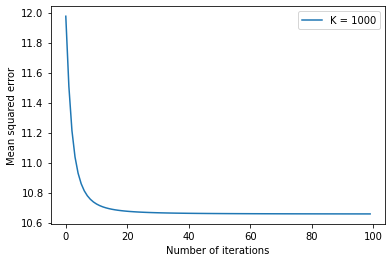

Training for k =  1500
iteration 0 loss 10.289144063971094
iteration 20 loss 8.68988305667101
iteration 40 loss 8.67728835970971
iteration 60 loss 8.674928329052216
iteration 80 loss 8.67411765764326


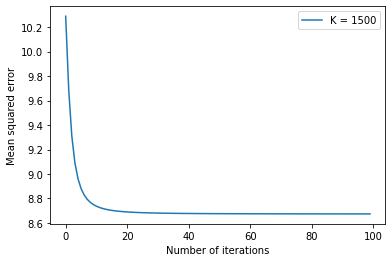

Training for k =  2000
iteration 0 loss 8.658526928066031
iteration 20 loss 6.927905561412507
iteration 40 loss 6.916460911282558
iteration 60 loss 6.914263724749644
iteration 80 loss 6.913493169630917


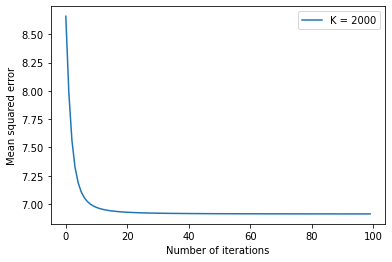

In [23]:
train_k()

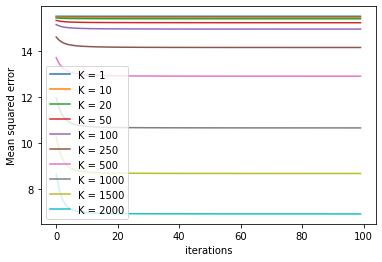

In [24]:
loss_curve[0][len(loss_curve[0]) - 1]
loss_curve_detail = []
for i, value in enumerate(loss_curve):
    plt.plot(value, label = 'K = ' + str(k_values[i]))
plt.xlabel('iterations')
plt.ylabel('Mean squared error')
plt.legend()
plt.savefig('K_values_with_loss.png')
plt.show()

# end

In [25]:
U_predicted = pd.read_csv('U_matrix2000.csv', header = None)
V_predicted = pd.read_csv('V_matrix2000.csv', header = None)

In [26]:
U_predicted = np.array(U_predicted, dtype = np.float32)
V_predicted = np.array(V_predicted, dtype = np.float32)

In [27]:
predicted_matrix = U_predicted.dot(V_predicted.T)
predicted_matrix -= 1
predicted_matrix

array([[ 7.8942413 ,  5.687706  ,  6.2745895 , ..., -0.51447487,
        -0.49471283, -1.012085  ],
       [ 3.8631897 ,  1.835762  ,  5.1246185 , ..., -1.5140781 ,
         3.9081345 , -1.7565002 ],
       [ 4.8810425 , -3.8608856 ,  8.347977  , ...,  0.04863548,
         1.0655212 ,  7.206352  ],
       ...,
       [ 4.753891  , -2.8988647 ,  2.381073  , ...,  0.89079475,
        -0.10031128,  2.732376  ],
       [ 2.4054565 ,  6.8271866 ,  2.89122   , ...,  0.26955605,
         2.756485  ,  5.7234573 ],
       [ 5.0086746 , -0.35125732, -0.18977356, ...,  3.7059708 ,
        -0.31482697,  4.5732193 ]], dtype=float32)

In [28]:
predicted_df = pd.DataFrame(predicted_matrix)
predicted_df

,0,1,2,3,4,5,6,7,8,9,...,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982
0,7.894241,5.687706,6.274590,9.487034,3.626244,5.486397,0.293659,0.906021,5.685722,-0.324887,...,1.176201,1.367493,4.156952,5.737534,5.465336,7.713184,2.991562,-0.514475,-0.494713,-1.012085
1,3.863190,1.835762,5.124619,1.600494,3.167332,2.063034,6.122646,7.609680,1.635078,3.741223,...,-2.273468,-1.159187,2.753355,4.216335,7.156189,1.528828,0.315384,-1.514078,3.908134,-1.756500
2,4.881042,-3.860886,8.347977,3.610294,7.348610,3.376442,0.039637,-3.436218,5.082520,5.085571,...,-3.111900,1.562210,6.421473,-0.387623,1.258335,7.708250,2.495430,0.048635,1.065521,7.206352
3,1.949692,-1.160355,0.856171,2.925087,2.957108,4.699745,2.526913,7.927841,2.783569,0.668431,...,2.952888,5.154915,2.749966,-2.683228,3.882977,1.880287,3.564705,-0.383617,4.028496,2.976357
4,0.665733,4.515457,1.723122,2.239235,4.736794,0.385956,-0.007658,2.049026,1.856819,1.248970,...,4.694489,-0.941772,2.123022,2.996021,4.591885,1.967762,3.342529,6.571077,8.444221,4.015900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44848,1.630463,-2.323158,6.993027,6.502731,-0.187080,3.882721,4.383657,0.783218,2.243553,2.434124,...,0.216286,2.595856,4.984587,4.242504,4.417377,3.583761,0.187729,5.564032,-0.627846,-0.448658
44849,4.014824,2.067001,5.246735,2.884449,3.551813,5.900196,0.564566,0.038376,2.925926,0.289194,...,4.061783,0.362534,0.791992,4.004723,-0.897980,4.740704,6.711548,-1.450994,0.198570,4.846100
44850,4.753891,-2.898865,2.381073,0.609955,1.049397,4.994068,5.732925,4.239090,2.654350,7.510484,...,0.591827,-0.980667,2.176765,-0.382004,-0.890488,0.289383,6.343285,0.890795,-0.100311,2.732376
44851,2.405457,6.827187,2.891220,-2.018791,4.774668,-0.979618,7.293596,-0.129196,2.206345,-0.808777,...,-1.125748,-1.208900,-0.499205,-0.231461,4.366364,4.446392,1.166946,0.269556,2.756485,5.723457


In [29]:
predicted_df.to_csv('predicted.csv', header=False, index=False)

# Cosine similarity of U and V

In [7]:
#cosine similarity for U
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
import seaborn as sns
U_predicted = pd.read_csv('U_matrix1000.csv', header = None)
U_predicted = np.array(U_predicted, dtype = np.float32)

V_predicted = pd.read_csv('V_matrix1000.csv', header = None)
V_predicted = np.array(V_predicted, dtype = np.float32)

In [8]:
cosine_u  = cosine_similarity(U_predicted[0:4000, :])
cosine_u

array([[1.0000005 , 0.99990004, 0.9998997 , ..., 0.99990404, 0.99990153,
        0.99990296],
       [0.99990004, 1.0000002 , 0.99990714, ..., 0.9999053 , 0.9999074 ,
        0.9999064 ],
       [0.9998997 , 0.99990714, 0.99999994, ..., 0.9999211 , 0.9999064 ,
        0.99990577],
       ...,
       [0.99990404, 0.9999053 , 0.9999211 , ..., 1.0000013 , 0.9999175 ,
        0.9999126 ],
       [0.99990153, 0.9999074 , 0.9999064 , ..., 0.9999175 , 0.99999976,
        0.9999032 ],
       [0.99990296, 0.9999064 , 0.99990577, ..., 0.9999126 , 0.9999032 ,
        1.0000001 ]], dtype=float32)

<AxesSubplot:>

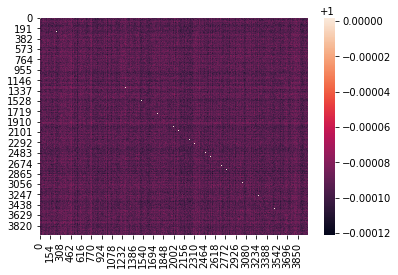

In [9]:
sns.heatmap(cosine_u)

In [10]:
cosine_v = cosine_similarity(V_predicted[0:4000, :])

<AxesSubplot:>

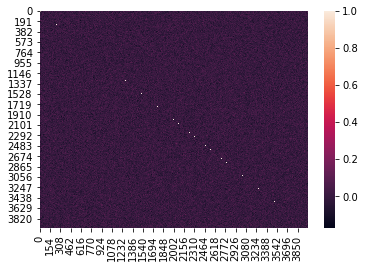

In [11]:
sns.heatmap(cosine_v)

# end

# Relation between U, K and V, K 

<AxesSubplot:>

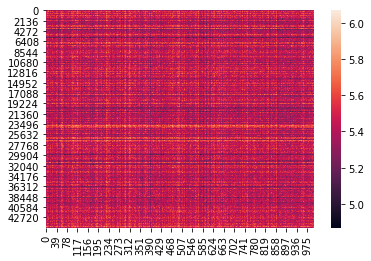

In [4]:
#recomendations
import seaborn as sns
sns.heatmap(U_predicted)

<AxesSubplot:>

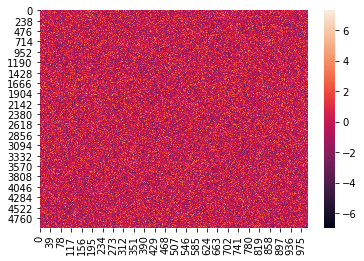

In [5]:
sns.heatmap(V_predicted)

# end

# Recomendation of 5 movies to a user

In [2]:
U_predicted = pd.read_csv('U_matrix1000.csv', header = None)
U_predicted = np.array(U_predicted, dtype = np.float32)

V_predicted = pd.read_csv('V_matrix1000.csv', header = None)
V_predicted = np.array(V_predicted, dtype = np.float32)

In [2]:
raw_data = pd.read_csv('raw_data.csv', header = None, index_col = None)
raw_data

,0,1,2,3,4,5,6,7,8,9,...,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982
0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,NaN,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,0.0,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,7.0,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,NaN,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,6.0,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44848,NaN,NaN,10.0,8.0,NaN,5.0,9.0,1.0,3.0,6.0,...,NaN,NaN,9.0,5.0,9.0,4.0,NaN,1.0,NaN,4.0
44849,2.0,3.0,7.0,NaN,10.0,9.0,NaN,NaN,1.0,4.0,...,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,NaN,8.0
44850,9.0,NaN,3.0,1.0,NaN,7.0,10.0,10.0,NaN,9.0,...,3.0,4.0,NaN,NaN,NaN,2.0,10.0,0.0,1.0,4.0
44851,NaN,7.0,3.0,3.0,8.0,NaN,8.0,9.0,NaN,NaN,...,NaN,NaN,NaN,3.0,5.0,NaN,6.0,NaN,8.0,8.0


In [3]:
predicted_csv = pd.read_csv('predicted.csv', header = None, index_col = None)
predicted_csv

,0,1,2,3,4,5,6,7,8,9,...,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982
0,7.894241,5.687706,6.274590,9.487034,3.626244,5.486397,0.293659,0.906021,5.685722,-0.324887,...,1.176201,1.367493,4.156952,5.737534,5.465336,7.713184,2.991562,-0.514475,-0.494713,-1.012085
1,3.863190,1.835762,5.124619,1.600494,3.167332,2.063034,6.122646,7.609680,1.635078,3.741223,...,-2.273468,-1.159187,2.753355,4.216335,7.156189,1.528828,0.315384,-1.514078,3.908135,-1.756500
2,4.881043,-3.860886,8.347977,3.610294,7.348610,3.376442,0.039637,-3.436218,5.082520,5.085571,...,-3.111900,1.562210,6.421473,-0.387623,1.258335,7.708250,2.495430,0.048635,1.065521,7.206352
3,1.949692,-1.160355,0.856171,2.925087,2.957108,4.699745,2.526913,7.927841,2.783569,0.668431,...,2.952888,5.154915,2.749966,-2.683228,3.882976,1.880287,3.564705,-0.383617,4.028496,2.976357
4,0.665733,4.515457,1.723122,2.239235,4.736794,0.385956,-0.007658,2.049027,1.856819,1.248970,...,4.694489,-0.941772,2.123022,2.996021,4.591885,1.967762,3.342529,6.571077,8.444221,4.015900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44848,1.630463,-2.323158,6.993027,6.502731,-0.187080,3.882721,4.383657,0.783218,2.243553,2.434124,...,0.216286,2.595856,4.984587,4.242504,4.417377,3.583761,0.187729,5.564032,-0.627846,-0.448658
44849,4.014824,2.067001,5.246735,2.884449,3.551813,5.900196,0.564566,0.038376,2.925926,0.289194,...,4.061783,0.362534,0.791992,4.004723,-0.897980,4.740704,6.711548,-1.450994,0.198570,4.846100
44850,4.753891,-2.898865,2.381073,0.609955,1.049397,4.994068,5.732925,4.239090,2.654350,7.510484,...,0.591827,-0.980667,2.176765,-0.382004,-0.890488,0.289383,6.343285,0.890795,-0.100311,2.732376
44851,2.405457,6.827187,2.891220,-2.018791,4.774668,-0.979618,7.293596,-0.129196,2.206345,-0.808777,...,-1.125748,-1.208900,-0.499205,-0.231461,4.366364,4.446392,1.166946,0.269556,2.756485,5.723457


In [38]:
# movie suggestion system
def suggest_movies(user_index = 4, num_movies = 5):
    movie_list = raw_data.iloc[user_index]
    Nan_list = [x for x in range(len(movie_list)) if pd.isna(movie_list[x])]
    pred_dict = {}
    for i in Nan_list:
        rating = predicted_csv.iloc[user_index][i]
        if(rating > 5):
            pred_dict[i] = predicted_csv.iloc[user_index][i]
    key_list = sorted(pred_dict)
    for key in key_list[0: num_movies + 1]:
        print(key, pred_dict[key])

In [40]:
suggest_movies()

258 6.3860054
504 5.1792126
679 5.9804077
983 5.2134
1071 5.1151505
1685 5.3699303


# end